In [35]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
from datetime import date
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

In [37]:
sns.set_theme(style='whitegrid')

In [38]:
# Load data
df = pd.read_csv('../infovis-project/processed_data/business_review_fused.gzip',compression='gzip',index_col=[0])
df_categories = pd.read_csv('../infovis-project/processed_data/business_category_counts.gzip',compression='gzip',index_col=[0])

df['highly_rated'] = df['stars'] >= df['stars'].mean()

df.head(5)

KeyError: 'stars'

In [4]:
df.head(5).describe()

,latitude,longitude,stars,review_count,is_open,Monday,Tuesday,Wednesday,Thursday,Friday,...,total_age,total_liked,star_1,star_2,star_3,star_4,star_5,avg_review_age,est_business_age,hours_per_week
count,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
mean,35.790727,-84.352017,2.900000,25.000000,0.800000,4.000000,11.750000,11.750000,10.500000,9.000000,...,177.184000,14.400000,4.400000,1.600000,2.600000,8.400000,9.400000,5.988000,7.476000,69.250000
std,4.659420,5.851569,1.140175,31.112698,0.447214,6.164414,5.965177,5.965177,5.567764,4.546061,...,242.331397,21.915748,2.408319,1.516575,3.646917,12.895736,15.598077,2.448983,4.682844,31.700421
min,27.955269,-90.321087,1.500000,6.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,30.440000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.350000,2.250000,23.000000
25%,36.208102,-87.058943,2.000000,10.000000,1.000000,0.000000,10.500000,10.500000,8.250000,7.500000,...,33.460000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,4.600000,3.450000,62.750000
50%,36.269593,-86.768170,3.000000,10.000000,1.000000,1.500000,14.000000,14.000000,11.500000,9.500000,...,46.030000,8.000000,5.000000,1.000000,1.000000,2.000000,3.000000,5.070000,8.220000,80.000000
75%,38.565165,-82.456320,4.000000,19.000000,1.000000,5.500000,15.250000,15.250000,13.750000,11.000000,...,179.880000,9.000000,6.000000,2.000000,2.000000,7.000000,6.000000,7.450000,9.800000,86.500000
max,39.955505,-75.155564,4.000000,80.000000,1.000000,13.000000,16.000000,16.000000,16.000000,14.000000,...,596.110000,53.000000,7.000000,4.000000,9.000000,31.000000,37.000000,9.470000,13.660000,94.000000


In [5]:
df_categories.head(5)

,count
Restaurants,52263
Food,15474
Nightlife,8723
Sandwiches,8366
Bars,8337


In [6]:
# Drop restaurants and food for categories as all remaining businesses are restaurants
df_categories.drop(['Restaurants', 'Food'], axis=0, inplace=True)

df_categories.head(10)

,count
Nightlife,8723
Sandwiches,8366
Bars,8337
American (Traditional),8137
Pizza,7092
Fast Food,6472
Breakfast & Brunch,6237
American (New),6096
Burgers,5634
Mexican,4600


In [7]:
df_processed = df.copy()

#Further modification of dataset if necessary
df_processed.drop(['total_age'], axis=1, inplace=True)

#Round lat and long
df_processed['latitude'] = df_processed['latitude'].round(2)
df_processed['longitude'] = df_processed['longitude'].round(2)

df_processed.head(10)

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,star_2,star_3,star_4,star_5,review_dates,avg_review_age,est_business_age,hours_per_week,checkins,highly_rated
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.96,-75.16,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",...,4,9,31,37,[numpy.datetime64('2013-10-05T15:19:06.0000000...,7.45,13.66,94.0,"2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011...",True
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.27,-87.06,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",...,1,0,2,0,[numpy.datetime64('2012-12-18T08:45:44.0000000...,5.07,8.22,84.0,"2012-12-16 05:27:33, 2013-02-15 04:00:46, 2013...",False
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.57,-90.32,3.0,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr...",...,2,1,7,3,[numpy.datetime64('2014-02-25T22:34:59.0000000...,9.47,2.25,NaN,"2012-04-16 22:28:12, 2012-04-20 22:38:55, 2012...",False
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.21,-86.77,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",...,1,1,0,1,[numpy.datetime64('2016-11-11T04:01:28.0000000...,4.60,9.80,76.0,"2011-01-17 15:31:21, 2011-02-23 21:28:08, 2011...",False
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,27.96,-82.46,4.0,10,1,"Vietnamese, Food, Restaurants, Food Trucks",...,0,2,2,6,[numpy.datetime64('2019-04-04T16:03:00.0000000...,3.35,3.45,23.0,"2018-07-19 20:23:33, 2019-07-12 15:37:41, 2019...",True
5,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,39.64,-86.13,2.5,28,1,"American (Traditional), Restaurants, Diners, B...",...,2,1,7,4,[numpy.datetime64('2016-05-08T08:49:25.0000000...,4.66,7.11,112.0,"2010-07-24 13:09:14, 2010-09-05 16:25:35, 2010...",False
6,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,FL,27.92,-82.76,4.5,100,0,"Food, Delis, Italian, Bakeries, Restaurants",...,4,1,18,74,[numpy.datetime64('2018-04-28T00:32:12.0000000...,7.19,9.40,58.0,"2010-08-26 17:52:51, 2011-02-13 00:43:54, 2011...",True
7,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,39.95,-75.14,4.0,245,1,"Sushi Bars, Restaurants, Japanese",...,12,29,50,142,[numpy.datetime64('2018-01-22T01:47:25.0000000...,3.57,4.14,53.0,"2017-11-25 02:28:19, 2017-11-28 23:17:19, 2017...",True
8,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,39.94,-75.16,4.5,205,1,"Korean, Restaurants",...,6,28,49,117,[numpy.datetime64('2016-10-27T01:10:32.0000000...,5.93,8.10,54.0,"2013-12-06 22:32:24, 2013-12-18 02:03:03, 2014...",True
9,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,53.55,-113.50,4.0,40,0,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...",...,2,4,22,8,[numpy.datetime64('2013-09-04T19:49:33.0000000...,9.15,3.05,67.0,"2012-07-30 18:35:27, 2012-08-11 20:40:23, 2012...",True


Pre-processing dataset: Data cleaning for missing samples, NAN’s. Explain which method was
used for the data cleaning. You will need to display the first few observations of the cleaned
dataset and the corresponding statistics.

In [8]:
# Before removing nulls
print(df_processed.isna().sum().sum())

61596


In [9]:
# Missing columns are all hours, since all businesses being analyzed are restaurants (similar types of businesses), it is reasonable to take the mode/median to fill both hours and hours open per day. Also consider all hours per week = 0 businesses as NA for the purpose of this section as these are either missing or erroneous entries. Note: some businesses marked as closed have hours listed, therefore NAs are not simply closed businesses.

#Set rows with 0 hours per week to NA
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hours_per_week']

df_processed[df_processed['hours_per_week'] == 0][days] = np.nan

#Fill all numeric with mean
df_processed.select_dtypes(include='number').fillna(df_processed.select_dtypes(include='number').mean(), inplace=True)

#Fill remainder with mode
null_columns = df_processed.isnull().sum()[df_processed.isnull().sum() > 0].index

for col in null_columns:
    df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

C:\Users\lkyoo\AppData\Local\Temp\ipykernel_20492\4244068421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed[df_processed['hours_per_week'] == 0][days] = np.nan


In [10]:
# After filling NAs and 0s, recalculate hours per week.
df_processed['hours_per_week'] = df_processed['Monday'] + df_processed['Tuesday'] + df_processed['Wednesday'] + df_processed['Thursday'] + df_processed['Friday'] + df_processed['Saturday'] + df_processed['Sunday']

# Categorize if business is open on the weekend (Saturday and Sunday both)
df_processed['open_weekends'] = ((df_processed['Saturday'] > 0) & (df_processed['Sunday'] > 0))

In [11]:
# After removing nulls
print(df_processed.isna().sum().sum())

0


In [12]:
df_processed.head(5)

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,star_3,star_4,star_5,review_dates,avg_review_age,est_business_age,hours_per_week,checkins,highly_rated,open_weekends
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.96,-75.16,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",...,9,31,37,[numpy.datetime64('2013-10-05T15:19:06.0000000...,7.45,13.66,94.000000,"2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011...",True,True
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.27,-87.06,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",...,0,2,0,[numpy.datetime64('2012-12-18T08:45:44.0000000...,5.07,8.22,84.000000,"2012-12-16 05:27:33, 2013-02-15 04:00:46, 2013...",False,True
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.57,-90.32,3.0,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr...",...,1,7,3,[numpy.datetime64('2014-02-25T22:34:59.0000000...,9.47,2.25,60.316822,"2012-04-16 22:28:12, 2012-04-20 22:38:55, 2012...",False,True
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.21,-86.77,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",...,1,0,1,[numpy.datetime64('2016-11-11T04:01:28.0000000...,4.60,9.80,76.000000,"2011-01-17 15:31:21, 2011-02-23 21:28:08, 2011...",False,True
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,27.96,-82.46,4.0,10,1,"Vietnamese, Food, Restaurants, Food Trucks",...,2,2,6,[numpy.datetime64('2019-04-04T16:03:00.0000000...,3.35,3.45,23.000000,"2018-07-19 20:23:33, 2019-07-12 15:37:41, 2019...",True,True


Outlier detection & removal: Use one of the methods explained in class for the outlier detection
and removal from the raw dataset.

D:\Users\lkyoo\anaconda3\envs\datavis_lab1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


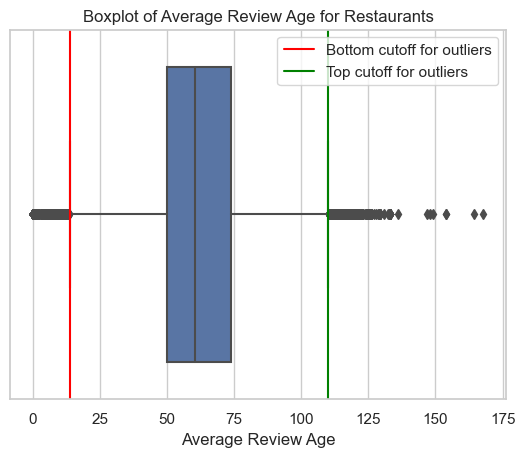

In [13]:
# Using IQR method
q1 = df_processed['hours_per_week'].quantile(.25)
q3 = df_processed['hours_per_week'].quantile(.75)
iqr = q3-q1
scale = 1.5

bottom_limit = q1 - (iqr*scale)
top_limit = q3 + (iqr*scale)

sns.boxplot(df_processed['hours_per_week'])
plt.grid(axis='x', which='minor')
plt.xlabel('Average Review Age')
plt.title('Boxplot of Average Review Age for Restaurants')
plt.axvline(bottom_limit, c='red', label="Bottom cutoff for outliers")
plt.axvline(top_limit, c='green', label="Top cutoff for outliers")
plt.legend()
plt.show()

D:\Users\lkyoo\anaconda3\envs\datavis_lab1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


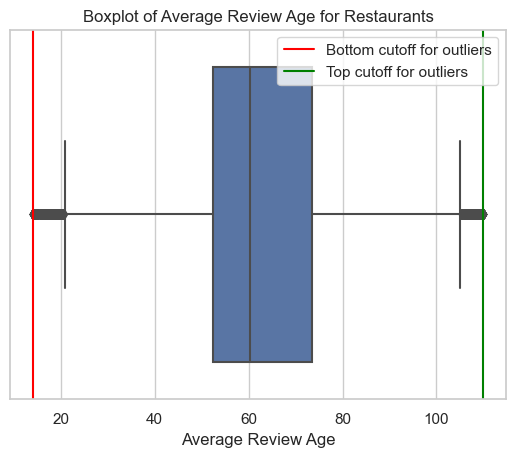

In [14]:
# Remove outliers
df_processed = df_processed[(df_processed['hours_per_week'] <= top_limit) & (df_processed['hours_per_week'] >= bottom_limit)]


sns.boxplot((df_processed['hours_per_week']))
plt.grid(axis='x', which='minor')
plt.xlabel('Average Review Age')
plt.title('Boxplot of Average Review Age for Restaurants')
plt.axvline(bottom_limit, c='red', label="Bottom cutoff for outliers")
plt.axvline(top_limit, c='green', label="Top cutoff for outliers")
plt.legend()
plt.show()

Principal Component Analysis (PCA): Perform a complete PCA analysis of the cleaned dataset for
a possible feature dimension reduction. Include the complete explanation into your report. Check
the condition number and the singular values of the reduced dimension features.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# All numeric features except is_open since its the label
X = df_processed.select_dtypes(include='number').drop('is_open', axis=1).values

# Scale features
X = StandardScaler().fit_transform(X)

# Keep all components for extra info
pca_full = PCA(n_components=len(df_processed.select_dtypes(include='number').drop('is_open', axis=1).columns), svd_solver='full')
X_pca_full = pca_full.fit_transform(X)
# MLE method
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pca.fit_transform(X)

# Minimum to achieve >0.90
pca_min = PCA(n_components=8, svd_solver='full')
X_pca_min = pca_min.fit_transform(X)

# Make 'is_open' the dependent variable
Y = df_processed['is_open']

In [17]:
# Condition number for original data
print(f'Condition number for original data is {np.linalg.cond(X):.2f} \n')

# EVR, condition number and Single Values
print(f'Explained variance ratio for all principal components: {pca_full.explained_variance_ratio_.round(2)}')
print(f'Singular values for all principal components: {pca_full.singular_values_.round(2)}')
print(f'Condition number for PCA with all components  is {np.linalg.cond(X_pca_full):.2f}\n')

print(f'Explained variance ratio for principal components selected by MLE: {pca.explained_variance_ratio_.round(2)}')
print(f'Singular values for principal components selected by MLE: {pca.singular_values_.round(2)}')
print(f'Condition number for PCA with MLE is {np.linalg.cond(X_pca):.2f}\n')

print(f'Explained variance ratio for manually tuned principal components: {pca_min.explained_variance_ratio_.round(2)}')
print(f'Singular values for manually tuned principal components: {pca_min.singular_values_.round(2)}')
print(f'Condition number for manually tuned PCA is {np.linalg.cond(X_pca_min):.2f}\n')

Condition number for original data is 13699431715996268.00 

Explained variance ratio for all principal components: [0.29 0.24 0.11 0.07 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.01 0.01 0.01
 0.01 0.   0.   0.   0.   0.   0.   0.  ]
Singular values for all principal components: [556.13 509.62 343.73 267.77 238.82 229.09 203.42 198.63 174.39 160.91
 146.25 110.46  95.23  91.7   80.54  58.13  54.48  48.59  35.95   3.21
   0.     0.  ]
Condition number for PCA with all components  is 12320648555006324.00

Explained variance ratio for principal components selected by MLE: [0.29 0.24 0.11 0.07 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.01 0.01 0.01
 0.01 0.   0.   0.   0.   0.  ]
Singular values for principal components selected by MLE: [556.13 509.62 343.73 267.77 238.82 229.09 203.42 198.63 174.39 160.91
 146.25 110.46  95.23  91.7   80.54  58.13  54.48  48.59  35.95   3.21]
Condition number for PCA with MLE is 173.33

Explained variance ratio for manually tuned principal components: [0.29 0.24 0.1

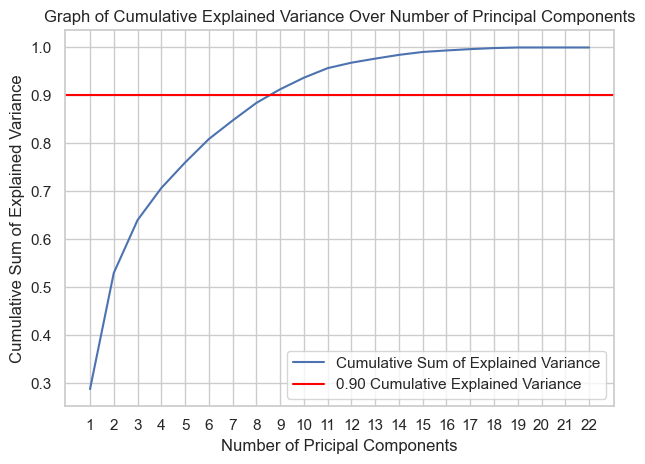

In [18]:
plt.figure()
plt.plot(np.arange(1, len(np.cumsum(pca_full.explained_variance_ratio_))+1, 1), np.cumsum(pca_full.explained_variance_ratio_), label='Cumulative Sum of Explained Variance')
plt.axhline(0.90, c='red', label="0.90 Cumulative Explained Variance")
plt.legend()
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xlabel('Number of Pricipal Components')
plt.title('Graph of Cumulative Explained Variance Over Number of Principal Components')
plt.xticks(np.arange(1, len(np.cumsum(pca_full.explained_variance_ratio_))+1, 1))
plt.tight_layout()
plt.show()

Normality test: Use one of the tests explained in class to see if the dataset comes from the
Gaussian distribution or not.

In [30]:
from scipy.stats import shapiro

# Get all numerical features sans is_open
df_norm = df_processed.select_dtypes(include='number').drop('is_open', axis=1)
alpha = 0.01

result = {}

for label, values in df_norm.iteritems():
    stats, p = shapiro(values)
    result[label] = {}
    if p > alpha:
        result[label]['normal'] = True
    else:
        result[label]['normal'] = False

    result[label]['stat'] = round(stats, 2)
    result[label]['p-value'] = p

df_norm = pd.DataFrame(result)

df_norm.T

D:\Users\lkyoo\anaconda3\envs\datavis_lab1\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,normal,stat,p-value
latitude,False,0.85,0.0
longitude,False,0.8,0.0
stars,False,0.94,0.0
review_count,False,0.39,0.0
Monday,False,0.89,0.0
Tuesday,False,0.92,0.0
Wednesday,False,0.95,0.0
Thursday,False,0.96,0.0
Friday,False,0.97,0.0
Saturday,False,0.94,0.0


Data transformation: If transformation of the dataset is needed, you need to explain which
method was used. For example: non-gaussian to gaussian distribution transformation.

In [29]:
# Log everything and rerun shapiro?
target_cols = df_processed.select_dtypes(include='number').columns.drop('is_open')
df_norm = df_processed.copy()
df_norm[target_cols] = np.sign(df_norm[target_cols]) * np.log(abs(df_norm[target_cols]) + 1)

df_norm2 = df_norm.select_dtypes(include='number').drop('is_open', axis=1)
alpha = 0.01

result = {}

for label, values in df_norm2.iteritems():
    stats, p = shapiro(values)
    result[label] = {}
    if p > alpha:
        result[label]['normal'] = True
    else:
        result[label]['normal'] = False

    result[label]['stat'] = round(stats,2)
    result[label]['p-value'] = p

df_norm2 = pd.DataFrame(result)

df_norm2.T

D:\Users\lkyoo\anaconda3\envs\datavis_lab1\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,normal,stat,p-value
latitude,False,0.85,0.0
longitude,False,0.83,0.0
stars,False,0.89,0.0
review_count,False,0.97,0.0
Monday,False,0.74,0.0
Tuesday,False,0.64,0.0
Wednesday,False,0.69,0.0
Thursday,False,0.79,0.0
Friday,False,0.81,0.0
Saturday,False,0.65,0.0


Heatmap & Pearson correlation coefficient matrix: Display the Pearson correlation coefficient
between variables using heatmap and scatter plot matrix.

In [21]:
# Pearson correlation table
# Pick features of interest

df_corr = df_norm[['stars','review_count','avg_review_age','hours_per_week','est_business_age', 'highly_rated']]

# Calculate pearson correlation
df_corr.corr().round(2)

,stars,review_count,avg_review_age,hours_per_week,est_business_age,highly_rated
stars,1.00,0.24,-0.16,-0.22,-0.14,0.74
review_count,0.24,1.00,0.02,-0.11,0.43,0.19
avg_review_age,-0.16,0.02,1.00,0.04,0.40,-0.23
hours_per_week,-0.22,-0.11,0.04,1.00,0.04,-0.24
est_business_age,-0.14,0.43,0.40,0.04,1.00,-0.15
highly_rated,0.74,0.19,-0.23,-0.24,-0.15,1.00


In [22]:
# Sns heatmap
df_corr.drop('highly_rated',axis=1).corr().round(2)

,stars,review_count,avg_review_age,hours_per_week,est_business_age
stars,1.00,0.24,-0.16,-0.22,-0.14
review_count,0.24,1.00,0.02,-0.11,0.43
avg_review_age,-0.16,0.02,1.00,0.04,0.40
hours_per_week,-0.22,-0.11,0.04,1.00,0.04
est_business_age,-0.14,0.43,0.40,0.04,1.00


Text(0.5, 1.0, 'Heatmap of log scaled numeric features')

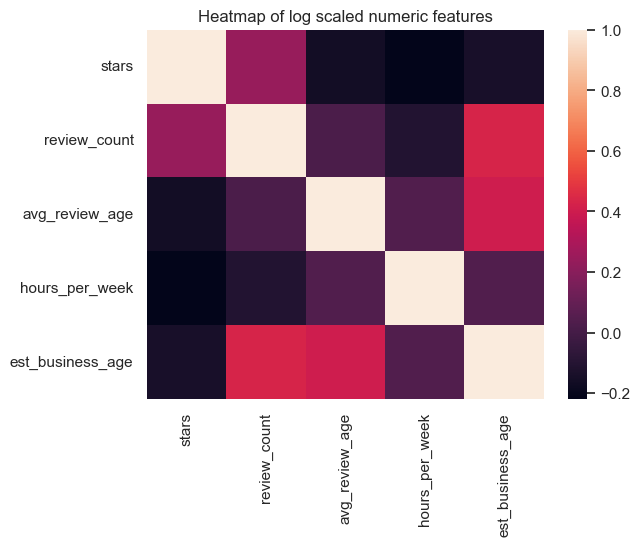

In [31]:
sns.heatmap(df_corr.drop('highly_rated',axis=1).corr().round(2))
plt.title('Heatmap of log scaled numeric features')

Text(0.5, 1.0, 'Pair plot of selected log scaled features.')

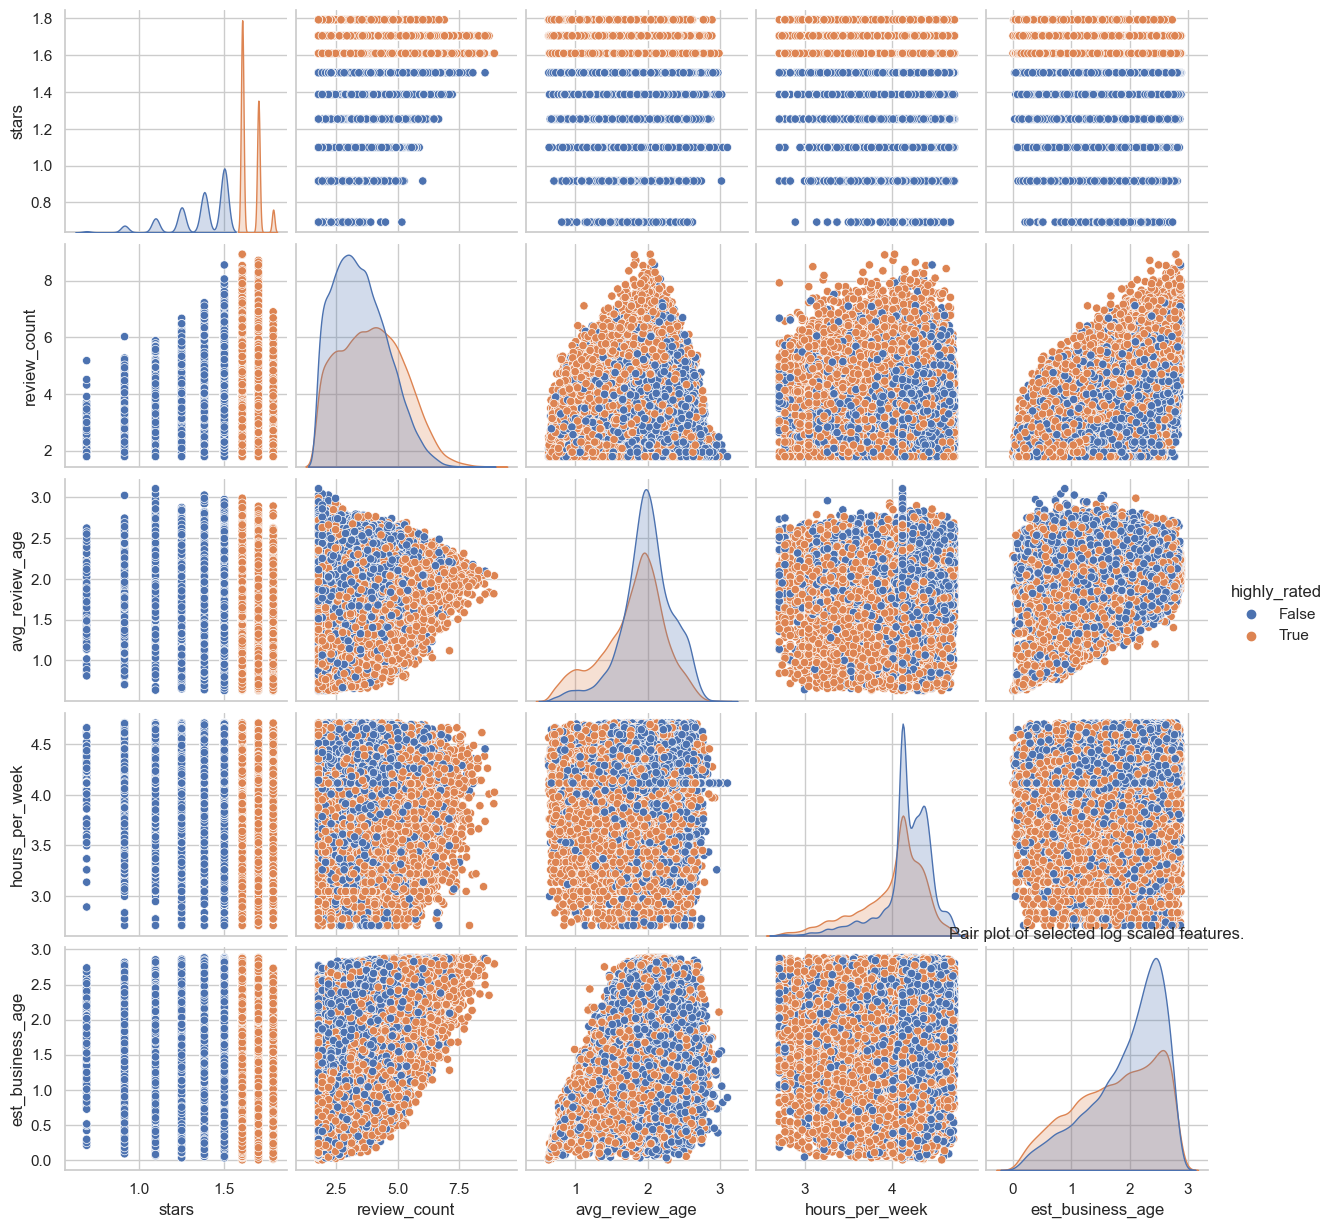

In [34]:
sns.pairplot(df_corr, hue="highly_rated")
plt.title('Pair plot of selected log scaled features.')

Statistics : You need to statistically analyze the dataset and write down your observations
accordingly. Use the statistics tools discussed in class. You will need to display the estimated
multivariate kernel density estimate.

In [ ]:
# Desc
df_processed.describe().round(2)

In [ ]:
# Pie chart
def my_autopct(pct):
    return ('%.2f %%' % pct) if pct > 7.5 else ''


statecounts = df['state'].value_counts()
statecounts = statecounts[statecounts.values > 1]

plt.pie(statecounts, labels=statecounts.keys(), autopct=my_autopct)

plt.title('Proportion of restaurants coming from each state')

plt.show()


In [ ]:
# KDE
kde_df = df_processed.copy()
kde_df = kde_df[days].drop('hours_per_week', axis=1)
result_df = pd.DataFrame(columns=['hours_open', 'Day'])

for column in kde_df.columns:
    temp_df = pd.DataFrame({'hours_open': kde_df[column]})
    temp_df['Day'] = column
    result_df = pd.concat([result_df, temp_df])

result_df = result_df.reset_index()

sns.kdeplot(data=result_df, x='hours_open', hue='Day', multiple='stack')
plt.title('Kernel Density Function of Hours Open during each day of the week')
plt.xlabel('Hours Open')
plt.show()